PART 3:


Q1:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
#https://drive.google.com/file/d/1kYwlFgwVOVX-aGZO-rMltxuL_cjPrHQz/view?usp=sharing

!pip install --upgrade --no-cache-dir gdown
!gdown 1kYwlFgwVOVX-aGZO-rMltxuL_cjPrHQz

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1kYwlFgwVOVX-aGZO-rMltxuL_cjPrHQz
To: /content/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 39.6MB/s]


In [3]:
df = pd.read_csv('/content/heart_disease_health_indicators.csv')

Q2:

In [4]:
X = df.iloc[:,1:21].values
y = df[['HeartDiseaseorAttack']].values

X.shape, y.shape

((253661, 20), (253661, 1))

In [5]:
# انتخاب نمونه‌های تصادفی از هر کلاس
samples_class_0 = df[df['HeartDiseaseorAttack'] == 0].sample(n=100, random_state=13)
samples_class_1 = df[df['HeartDiseaseorAttack'] == 1].sample(n=100, random_state=13)

# ادغام داده‌های انتخاب شده
df_sample = pd.concat([samples_class_0, samples_class_1])

# مخلوط کردن 200 داده ادغام شده
shuffled_df = df_sample.sample(frac=1, random_state=13).reset_index(drop=True)

samples_class_0.shape, samples_class_1.shape, df_sample.shape ,shuffled_df.shape

((100, 22), (100, 22), (200, 22), (200, 22))

Q3:

In [6]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier

In [7]:
from sklearn.metrics import log_loss
from sklearn.metrics import log_loss

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=13, test_size = 0.2)

In [9]:
y_train_reshaped = np.ravel(y_train)
y_test_reshaped = np.ravel(y_test)

In [10]:
model1 = LogisticRegression(solver='sag', max_iter=300)
model1.fit(x_train, y_train_reshaped)
model1.predict(x_test)

print("Accuracy of test data: %", model1.score(x_test, y_test_reshaped)*100)
print("Accuracy of train data: %", model1.score(x_train, y_train_reshaped)*100)

Accuracy of test data: % 90.74763960341396
Accuracy of train data: % 90.75435622486793


In [11]:
model2 = SGDClassifier(loss='log_loss', random_state=13, max_iter=2000)
model2.fit(x_train, y_train_reshaped)
model2.predict(x_test)

print("Accuracy of test data: %", model2.score(x_test, y_test_reshaped)*100)
print("Accuracy of train data: %", model2.score(x_train, y_train_reshaped)*100)

Accuracy of test data: % 90.72792856720477
Accuracy of train data: % 90.7262674446109


Q4:

In [12]:
from sklearn.metrics import log_loss

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


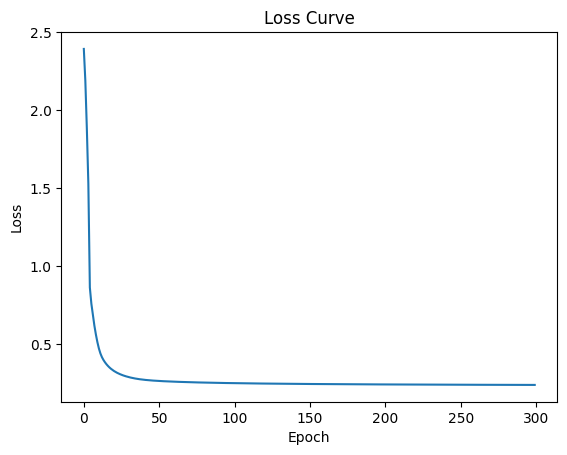

In [18]:
model = SGDClassifier(loss='log', random_state=83)
losses = []
epochs = 300

for _ in range(epochs):

    model.partial_fit(x_train, y_train_reshaped, [0, 1])
    loss = log_loss(y_train , model.predict_proba(x_train))
    losses.append(loss)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Q5:

In [ ]:
from sklearn.metrics import f1_score

model2 = SGDClassifier(loss='log_loss', random_state=13, max_iter=2000)
model2.fit(x_train, y_train_reshaped)
y_pred = model2.predict(x_test)

f1 = f1_score(y_test, y_pred)
print("F1-Score on test data: ", f1)

F1-Score on test data:  0.2112676056338028
